In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
# Load CSV data
df = pd.read_csv('Churn_Modelling.csv')

In [9]:
# Separate features and target
X = df.iloc[:, :-1]  # Keep as DataFrame for get_dummies
y = df.iloc[:, -1].values

In [10]:
# Encode target labels if categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# One-hot encode all categorical feature columns at once
X_encoded = pd.get_dummies(X)

In [12]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
# Define and train MLP model
model = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [15]:
# Predict
y_pred = model.predict(X_test)
# Print classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1607
           1       0.28      0.44      0.34       393

    accuracy                           0.66      2000
   macro avg       0.56      0.58      0.56      2000
weighted avg       0.73      0.66      0.69      2000



=== Confusion Matrix ===
[[1153  454]
 [ 220  173]]


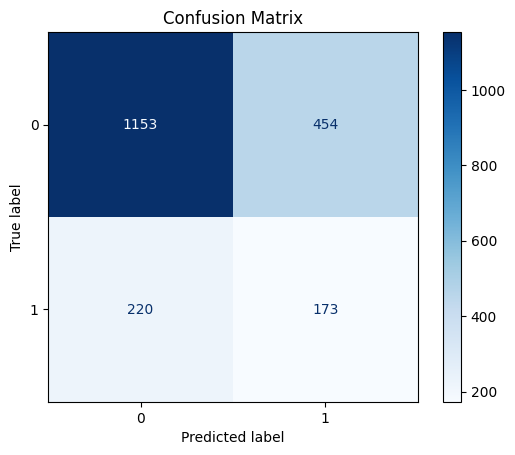

In [16]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()